In [1]:
import os 
import requests
from bs4 import BeautifulSoup
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime
import time
import random

In [216]:
# Comment out API keys to avoid running cells by accident



In [217]:
# check key
# Note: This API call is free
url = "https://api.purpleair.com/v1/keys"

headers = {
    "X-API-KEY": api_key
}

response = requests.get(url, headers=headers)

# Check the response status code
data = response.json()

if response.status_code < 210:
    print(data)
else:
    print (response.status_code)


NameError: name 'api_key' is not defined

In [3]:
#get unix time
def get_date_range(start_tuple,end_tuple):
    start_date = datetime.datetime(*start_tuple)
    end_date = datetime.datetime(*end_tuple)
   
    return time.mktime(start_date.timetuple()),time.mktime(end_date.timetuple())

start_tuple = (2020,2,1)
end_tuple = (2020,2,2) 
start_time,end_time = get_date_range(start_tuple,end_tuple)
print (f'unix start time => {start_time}')
print (f'datetime start=> {datetime.datetime.fromtimestamp(start_time)}')

unix start time => 1580544000.0
datetime start=> 2020-02-01 00:00:00


In [330]:
# get history for index

def historical_sensor(api_key,sensor_index,start_time,end_time):

    # Constructing the URL for the API endpoint
    url = f'https://api.purpleair.com/v1/sensors/{sensor_index}/history'
    p10 = 'pm10.0_atm, pm10.0_atm_a, pm10.0_atm_b, pm10.0_cf_1, pm10.0_cf_1_a, pm10.0_cf_1_b'
    p2_5 = 'pm2.5_alt, pm2.5_alt_a, pm2.5_alt_b, pm2.5_atm, pm2.5_atm_a, pm2.5_atm_b, pm2.5_cf_1, pm2.5_cf_1_a, pm2.5_cf_1_b'


    # Headers for authentication
    headers = {
        'X-API-Key': api_key
    }

    # Parameters for the time range
    params = {
        'start_timestamp': start_time,
        'end_timestamp': end_time,
        'fields': p10 + ',' + p2_5,
        'average': '1440'
    }

    # Making the GET request
    response = requests.get(url, headers=headers,params=params)

    return response.json()


In [414]:
start_tuple = (2019,9,1)
end_tuple = (2020,9,1) 
start_time,end_time = get_date_range(start_tuple,end_tuple)

# return historical data
s4 = historical_sensor(api_read_key,'19209',start_time,end_time)

s1 = 43185 (indoor)
s3 = 43465 (indoor) - now s4 same
s2 = 46873 (outdoor)
s4 = 119209 (indoor - legacy village)

In [415]:
s = pd.DataFrame(s4['data'],columns = s4['fields'])
s.head()

,time_stamp,pm2.5_alt,pm2.5_alt_a,pm2.5_alt_b,pm2.5_atm,pm2.5_atm_a,pm2.5_atm_b,pm2.5_cf_1,pm2.5_cf_1_a,pm2.5_cf_1_b,pm10.0_atm,pm10.0_atm_a,pm10.0_atm_b,pm10.0_cf_1,pm10.0_cf_1_a,pm10.0_cf_1_b
0,1571097600,4.8,5.0,4.7,7.2405,7.445,7.036,7.2405,7.445,7.036,7.665,7.806,7.524,7.6650,7.806,7.524
1,1582588800,1.6,1.6,1.5,1.7955,1.816,1.775,1.7955,1.816,1.775,2.221,2.429,2.013,2.0080,2.003,2.013
2,1581465600,2.9,2.9,2.8,3.9535,4.011,3.896,3.9535,4.011,3.896,4.442,4.451,4.433,4.4420,4.451,4.433
3,1588032000,0.9,0.9,0.9,0.5180,0.506,0.530,0.5180,0.506,0.530,0.629,0.604,0.654,0.6295,0.605,0.654
4,1569801600,2.6,2.7,2.5,3.5585,3.673,3.444,3.5585,3.673,3.444,3.801,3.872,3.730,3.8010,3.872,3.730


In [416]:
s=s.sort_values(by=['time_stamp'],ascending=True)
s.reset_index(inplace=True)
s=s.drop(columns=['index'])

In [421]:
s=s2

In [423]:
xv_date = get_shutdown_date(s)
xv_date

194

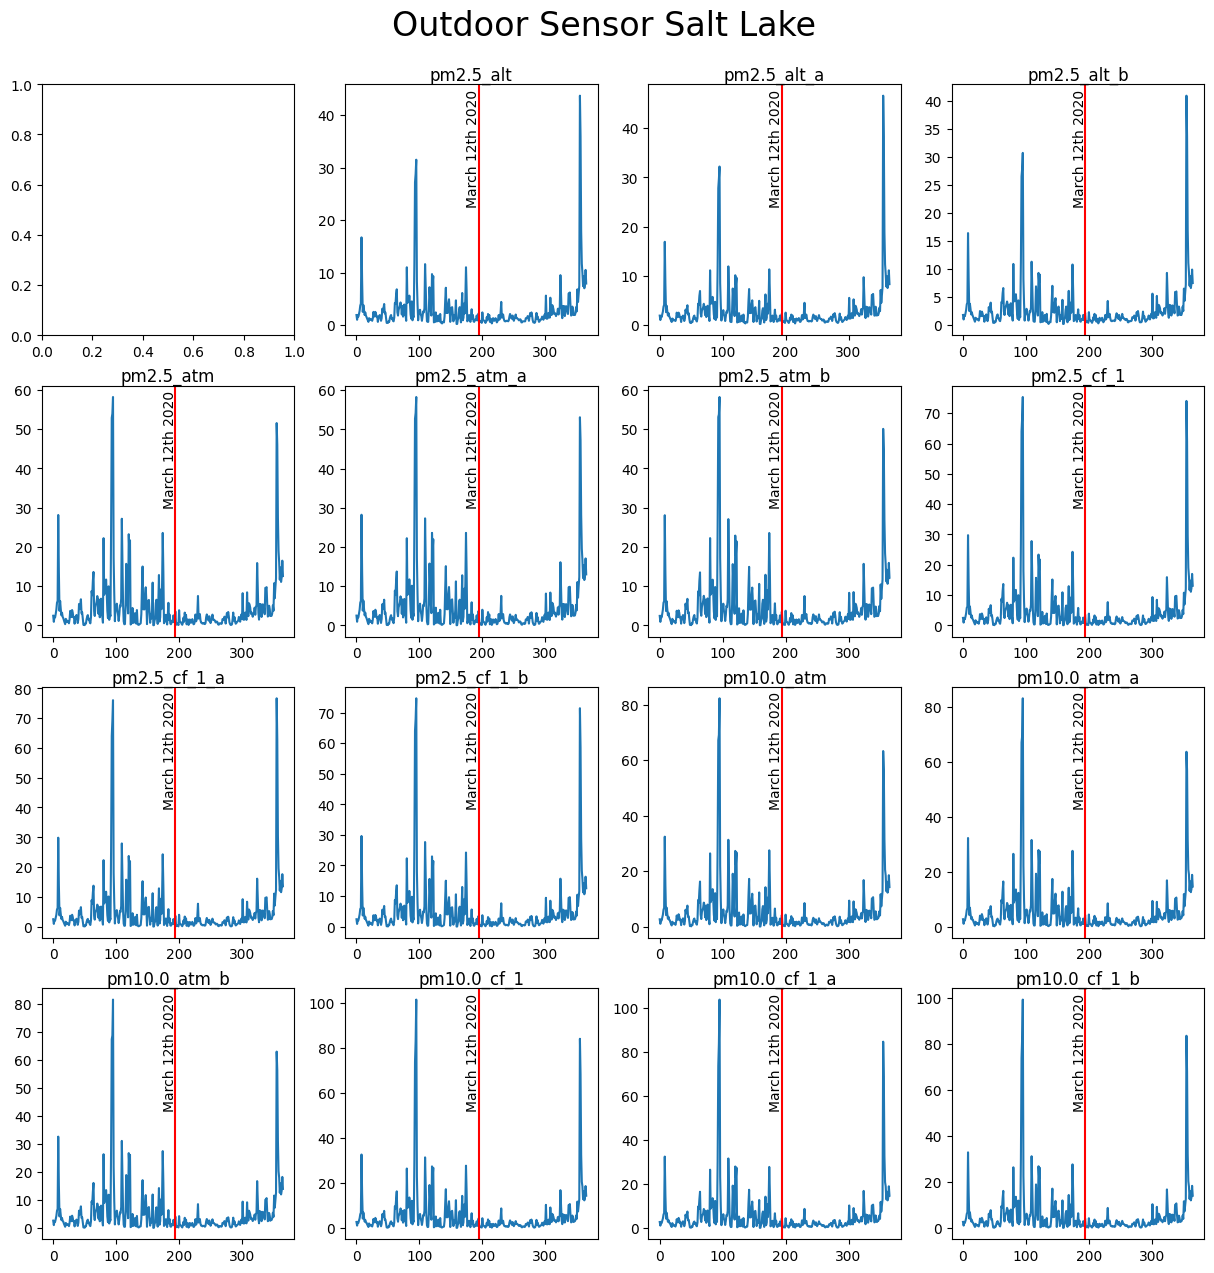

In [425]:
xv_date = get_shutdown_date(s)

tile_len = int(len(s.columns)/4)
fig, axs = plt.subplots(tile_len,tile_len,figsize=(15,15))
axs = axs.flatten()
fig.suptitle('Outdoor Sensor Salt Lake',fontsize=24,y=.93)

for i, column in enumerate(s.columns):
        if i!=0 and s[column].values[0]!=None:
            x=range(len(s))
            y=(s[column])
            axs[i].plot(x,y)
            ymin, ymax = axs[i].get_ylim()
            axs[i].axvline(x = xv_date, color = 'r', label = 'axvline - full height')
            axs[i].set_title(column)
            
            axs[i].text(xv_date-20,ymax/2,'March 12th 2020',rotation=90)
plt.show()
fig.savefig('outdoor_sensor.png')

In [363]:
s['pm2.5_atm_b'].values[0]==None

True

In [339]:
def get_shutdown_date(s):
    for row in s.iterrows():
        if (datetime.datetime.fromtimestamp(row[1].time_stamp).month == 3) &\
        (datetime.datetime.fromtimestamp(row[1].time_stamp).day == 12):
            return row[0]
        


# Wind


In [432]:
!pip install openmeteo-requests
#!pip install requests-cache retry-requests numpy pandas

In [468]:


# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
#40.799885, -112.071561
#40.611684, -111.862544
params = {
	"latitude": 40.509573,
	"longitude": -111.759433,
	"start_date": "2020-02-04",
	"end_date": "2020-02-18",
	"daily": ["wind_speed_10m_max", "wind_gusts_10m_max", "wind_direction_10m_dominant"],
	"temperature_unit": "fahrenheit",
	"wind_speed_unit": "mph",
	"precipitation_unit": "inch",
	"timezone": "America/Denver"
}
responses = requests.get(url, params=params)



In [445]:
pd.DataFrame(responses.json()['daily'])

,time,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant
0,2020-02-04,12.2,22.6,332
1,2020-02-05,11.9,23.3,199
2,2020-02-06,7.0,15.9,204
3,2020-02-07,5.6,13.6,347
4,2020-02-08,7.6,16.6,214
5,2020-02-09,9.2,17.0,192
6,2020-02-10,9.5,18.3,189
7,2020-02-11,11.1,20.8,192
8,2020-02-12,11.6,21.5,190
9,2020-02-13,14.5,24.8,317


In [447]:
pd.DataFrame(responses.json()['daily'])

,time,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant
0,2020-02-04,7.8,13.4,288
1,2020-02-05,8.1,13.2,146
2,2020-02-06,10.7,17.0,177
3,2020-02-07,11.0,17.4,229
4,2020-02-08,19.5,35.8,253
5,2020-02-09,12.2,20.8,285
6,2020-02-10,9.7,17.7,302
7,2020-02-11,8.3,14.8,280
8,2020-02-12,7.6,15.7,209
9,2020-02-13,8.2,16.1,140


In [449]:
pd.DataFrame(responses.json()['daily'])

,time,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant
0,2020-02-04,8.5,14.3,22
1,2020-02-05,10.8,20.8,143
2,2020-02-06,13.5,25.3,140
3,2020-02-07,8.9,15.9,127
4,2020-02-08,19.4,36.9,142
5,2020-02-09,11.7,25.7,347
6,2020-02-10,11.0,23.0,6
7,2020-02-11,6.1,13.6,98
8,2020-02-12,8.1,16.3,126
9,2020-02-13,11.5,23.7,159


In [451]:
pd.DataFrame(responses.json()['daily'])

,time,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant
0,2020-02-04,5.6,26.6,329
1,2020-02-05,7.4,38.0,300
2,2020-02-06,10.8,54.4,288
3,2020-02-07,12.0,54.6,281
4,2020-02-08,9.6,41.4,280
5,2020-02-09,3.5,20.6,340
6,2020-02-10,5.0,24.6,316
7,2020-02-11,8.5,36.2,315
8,2020-02-12,8.4,36.2,305
9,2020-02-13,7.0,30.2,290


In [465]:
pd.DataFrame(responses.json()['daily'])

,time,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant
0,2020-02-04,5.0,32.7,8
1,2020-02-05,3.4,38.3,45
2,2020-02-06,8.9,62.2,320
3,2020-02-07,8.0,55.5,309
4,2020-02-08,8.2,44.3,62
5,2020-02-09,4.5,31.5,33
6,2020-02-10,5.2,29.3,5
7,2020-02-11,4.3,34.0,8
8,2020-02-12,5.2,34.9,345
9,2020-02-13,5.0,30.2,347


In [469]:
pd.DataFrame(responses.json()['daily'])

,time,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant
0,2020-02-04,5.6,26.6,329
1,2020-02-05,7.4,38.0,300
2,2020-02-06,10.8,54.4,288
3,2020-02-07,12.0,54.6,281
4,2020-02-08,9.6,41.4,280
5,2020-02-09,3.5,20.6,340
6,2020-02-10,5.0,24.6,316
7,2020-02-11,8.5,36.2,315
8,2020-02-12,8.4,36.2,305
9,2020-02-13,7.0,30.2,290


In [6]:
lat_range = {'start':41.66,'end':40.31}
lon_range = {'start':-113.42,'end':-110.58}

step_lat = -.1
step_lon = .2

lat_curr = lat_range['start']
lon_curr = lon_range['start']

one_day_lon = []
one_day_lat = []

while lon_curr <= lon_range['end']:
    
    while lat_curr >= lat_range['end']:
        
        one_day_lon.append(lon_curr)
        one_day_lat.append(lat_curr)
        
        lat_curr += step_lat
        
    lat_curr = lat_range['start']
    lon_curr += step_lon

In [97]:
one_day_lon

[-113.42,
 -113.42,
 -113.42,
 -113.42,
 -113.42,
 -113.42,
 -113.42,
 -113.42,
 -113.42,
 -113.42,
 -113.42,
 -113.42,
 -113.42,
 -113.42,
 -113.32000000000001,
 -113.32000000000001,
 -113.32000000000001,
 -113.32000000000001,
 -113.32000000000001,
 -113.32000000000001,
 -113.32000000000001,
 -113.32000000000001,
 -113.32000000000001,
 -113.32000000000001,
 -113.32000000000001,
 -113.32000000000001,
 -113.32000000000001,
 -113.32000000000001,
 -113.22000000000001,
 -113.22000000000001,
 -113.22000000000001,
 -113.22000000000001,
 -113.22000000000001,
 -113.22000000000001,
 -113.22000000000001,
 -113.22000000000001,
 -113.22000000000001,
 -113.22000000000001,
 -113.22000000000001,
 -113.22000000000001,
 -113.22000000000001,
 -113.22000000000001,
 -113.12000000000002,
 -113.12000000000002,
 -113.12000000000002,
 -113.12000000000002,
 -113.12000000000002,
 -113.12000000000002,
 -113.12000000000002,
 -113.12000000000002,
 -113.12000000000002,
 -113.12000000000002,
 -113.12000000000002,
 -

In [98]:
for i in range(len(one_day_lon)):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [126]:
date = datetime.datetime(2003,8,1)
while date < datetime.datetime.strptime("2020-02-04", '%Y-%m-%d'):
    date += datetime.timedelta(days=10)
    print(date) 

#datetime.datetime.strptime("2020-02-04", '%Y-%m-%d') + datetime.timedelta(days=10)

#datetime.datetime("2020-02-04")

2003-08-11 00:00:00
2003-08-21 00:00:00
2003-08-31 00:00:00
2003-09-10 00:00:00
2003-09-20 00:00:00
2003-09-30 00:00:00
2003-10-10 00:00:00
2003-10-20 00:00:00
2003-10-30 00:00:00
2003-11-09 00:00:00
2003-11-19 00:00:00
2003-11-29 00:00:00
2003-12-09 00:00:00
2003-12-19 00:00:00
2003-12-29 00:00:00
2004-01-08 00:00:00
2004-01-18 00:00:00
2004-01-28 00:00:00
2004-02-07 00:00:00
2004-02-17 00:00:00
2004-02-27 00:00:00
2004-03-08 00:00:00
2004-03-18 00:00:00
2004-03-28 00:00:00
2004-04-07 00:00:00
2004-04-17 00:00:00
2004-04-27 00:00:00
2004-05-07 00:00:00
2004-05-17 00:00:00
2004-05-27 00:00:00
2004-06-06 00:00:00
2004-06-16 00:00:00
2004-06-26 00:00:00
2004-07-06 00:00:00
2004-07-16 00:00:00
2004-07-26 00:00:00
2004-08-05 00:00:00
2004-08-15 00:00:00
2004-08-25 00:00:00
2004-09-04 00:00:00
2004-09-14 00:00:00
2004-09-24 00:00:00
2004-10-04 00:00:00
2004-10-14 00:00:00
2004-10-24 00:00:00
2004-11-03 00:00:00
2004-11-13 00:00:00
2004-11-23 00:00:00
2004-12-03 00:00:00
2004-12-13 00:00:00


In [124]:
date.timedelta(0)

AttributeError: 'datetime.datetime' object has no attribute 'timedelta'

In [10]:
wind_df = pd.DataFrame({})
type(wind_df)

pandas.core.frame.DataFrame

In [11]:
# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
start_date = datetime.datetime.strptime("2016-01-01", '%Y-%m-%d')
end_date = start_date + datetime.timedelta(days=10)

final_date = datetime.datetime.strptime("2017-01-11", '%Y-%m-%d')

i=1

while start_date < final_date:
    print(start_date)
    for i in range(0,len(one_day_lat),29):

        url = "https://archive-api.open-meteo.com/v1/archive"

        params = {
            "latitude": one_day_lat[i:i+29],
            "longitude": one_day_lon[i:i+29],
            "start_date": datetime.datetime.strftime(start_date, '%Y-%m-%d'),
            "end_date": datetime.datetime.strftime(end_date, '%Y-%m-%d'),
            "daily": ["wind_speed_10m_max", "wind_gusts_10m_max", "wind_direction_10m_dominant",\
                     'weather_code','temperature_2m_max','temperature_2m_min',\
                     'rain_sum','snowfall_sum','precipitation_hours'],
            "temperature_unit": "fahrenheit",
            "wind_speed_unit": "mph",
            "timezone": "America/Denver"
        }
        responses = requests.get(url, params=params).json()

        temp_df_b = pd.DataFrame()
        for response in responses:
    
            temp_df = pd.DataFrame(response['daily'])
            temp_df['latitiude'] = response['latitude']
            temp_df['longitude'] = response['longitude']
            temp_df['elevation'] = response['elevation']
            temp_df.drop_duplicates(subset=['wind_speed_10m_max',\
                                            'wind_gusts_10m_max',\
                                            'wind_direction_10m_dominant',\
                                            'weather_code','temperature_2m_max','temperature_2m_min',\
                                            'rain_sum','snowfall_sum','precipitation_hours',\
                                            'time'], keep='first',inplace = True)

            temp_df_b = pd.concat([temp_df_b,temp_df],ignore_index=True)

        wind_df = pd.concat([wind_df,temp_df_b],ignore_index=True)
        time.sleep(1+random.random())
    
    time.sleep(1.9+random.random())
    start_date += datetime.timedelta(days=11)
    end_date = start_date + datetime.timedelta(days=10)
    

2016-01-01 00:00:00
2016-01-12 00:00:00
2016-01-23 00:00:00
2016-02-03 00:00:00
2016-02-14 00:00:00
2016-02-25 00:00:00
2016-03-07 00:00:00
2016-03-18 00:00:00
2016-03-29 00:00:00
2016-04-09 00:00:00
2016-04-20 00:00:00
2016-05-01 00:00:00


TypeError: string indices must be integers

In [15]:
#wind_df.drop_duplicates(inplace=True)
wind_df.drop_duplicates(subset=['wind_speed_10m_max',\
                                'wind_gusts_10m_max',\
                                'wind_direction_10m_dominant',\
                                'time'], keep='first',inplace = True)

In [21]:
wind_df.rename(columns={'latitiude':'latitude'}, inplace=True)

In [22]:
wind_df.sort_values(['time','latitude','longitude'],inplace=True)

In [24]:
wind_df.to_csv('weather_wind_2016_1stQuarter.csv')

In [233]:
url = "https://archive-api.open-meteo.com/v1/archive"

params = {
    "latitude": one_day_lat[0:2],
    "longitude": one_day_lon[0:2],
    "start_date": '2016-01-01',
    "end_date": '2016-01-02',
    "daily": ["wind_speed_10m_max", "wind_gusts_10m_max", "wind_direction_10m_dominant"],
    "temperature_unit": "fahrenheit",
    "wind_speed_unit": "mph",
    "timezone": "America/Denver"
}
responses = requests.get(url, params=params).json()
# temp_df = pd.DataFrame(responses['daily'])
# temp_df['latitiude'] = responses['latitude']
# temp_df['longitude'] = responses['longitude']
# temp_df['elevation'] = responses['elevation']

In [246]:
temp_df_b = pd.DataFrame()
for response in responses:
    
    temp_df = pd.DataFrame(response['daily'])
    temp_df['latitiude'] = response['latitude']
    temp_df['longitude'] = response['longitude']
    temp_df['elevation'] = response['elevation']
    
    temp_df_b = pd.concat([temp_df_b,temp_df],ignore_index=True)
temp_df_b

,time,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,latitiude,longitude,elevation
0,2016-01-01,8.4,14.3,348,41.652020,-113.54048,1562.0
1,2016-01-02,6.9,10.1,9,41.652020,-113.54048,1562.0
2,2016-01-01,6.3,10.3,5,41.581722,-113.24675,1513.0
3,2016-01-02,4.6,10.3,35,41.581722,-113.24675,1513.0


In [207]:
one_day_lat[377:406]

[40.35999999999998,
 41.66,
 41.559999999999995,
 41.459999999999994,
 41.35999999999999,
 41.25999999999999,
 41.15999999999999,
 41.05999999999999,
 40.95999999999999,
 40.859999999999985,
 40.759999999999984,
 40.65999999999998,
 40.55999999999998,
 40.45999999999998,
 40.35999999999998,
 41.66,
 41.559999999999995,
 41.459999999999994,
 41.35999999999999,
 41.25999999999999,
 41.15999999999999,
 41.05999999999999,
 40.95999999999999,
 40.859999999999985,
 40.759999999999984,
 40.65999999999998,
 40.55999999999998,
 40.45999999999998,
 40.35999999999998]

In [200]:
one_day_lat[0:5]

[41.66,
 41.559999999999995,
 41.459999999999994,
 41.35999999999999,
 41.25999999999999]

# Mapping

In [38]:
! conda install -c conda-forge folium -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 24.1.2

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.1.2



## Package Plan ##

  environment location: /Users/juliakauffmann/miniforge3

  added / updated specs:
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.7.1               |     pyhd8ed1ab_0          29 KB  conda-forge
    ca-certificates-2024.2.2   |       hf0a4a13_0         152 KB  conda-forge
    certifi-2024.2.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    folium-0.16.0              |     pyhd8ed1ab_0          72 KB  conda-forge
    jinja2-3.1.3               |     pyhd8ed1ab_0         109 KB  conda-forge
    markupsafe-2.1.5           

In [39]:
import folium

# Latitude and Longitude of Salt Lake City (approximate)
lat, lon = 40.7608, -111.8910

# Create a map centered around Salt Lake City
map_salt_lake_city = folium.Map(location=[lat, lon], zoom_start=12)

# Display the map
map_salt_lake_city



ModuleNotFoundError: No module named 'folium'

In [6]:
import plotly.express as px

# Your Mapbox Access Token (optional for OpenStreetMap)
px.set_mapbox_access_token('YOUR_MAPBOX_ACCESS_TOKEN')

# Create a scatter map
fig = px.scatter_mapbox(lat=[40.7608], lon=[-111.8910],
                        zoom=10, height=300,
                        mapbox_style="open-street-map")

# Show the figure
fig.show()


ModuleNotFoundError: No module named 'plotly'